In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from mopet import mopet

from synchronization import plots
from synchronization import runner
from synchronization import constants

# Test Field 

Goal is to modify coupling strengths so that bursting in E and I population vanishes.

* Bursting of Exc pop is reduced if J_itoe is increased
* Bursting of Inh pop is reduced if J_itoi is increased


**Challenge:**

* Increased noise strengths must still lead to synchronization!


## Default Parameters

* Drive from E -> I needs to stay so low that I neurons do not burst!


In [65]:
params = {
  "runtime": 1000.0,

  "J_itoi": 6.0,
  "J_etoe": 0.1,
  "J_etoi": 0.3,
  "J_itoe": 6.0,
    
  "J_ppee": 0.6,
  "J_ppei": 0.6,

  "ou_enabled": [False, False],

  "poisson_enabled": [True, True],
  "poisson_variance": 2.0,
  "poisson_p": 0.7,
  "poisson_size": 800,
  "poisson_mean_input": 250,

  "N_pop": 2
}

## The ideal model

In [63]:
params_mid = dict(params)

params_mid.update({
  "J_ppee": 0.3,
  "J_ppei": 0.3,
  "poisson_variance": 7.0,
  "p_ppee": 0.05,
  "p_ppei": 0.05,
  "poisson_I_enabled": True,
  "poisson_I_ratio": 0.2,
})

low_strength = runner.run(
    modified_params=params_mid
)

Initializing net ...
Net 1 - poisson rate 8928.571428571428 - single neuron 11.160714285714285
Poisson strength: 0.028
I rate 2.232142857142857
Net 2 - rate for single neuron 7.812499999999999
Initialization time: 0.49806928634643555s
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 3s
runtime: 10.0


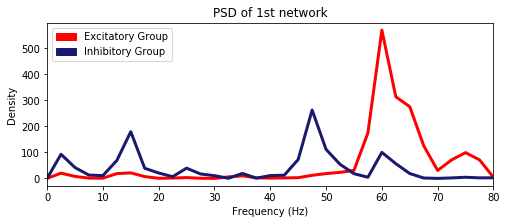

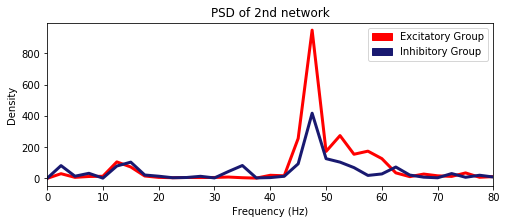

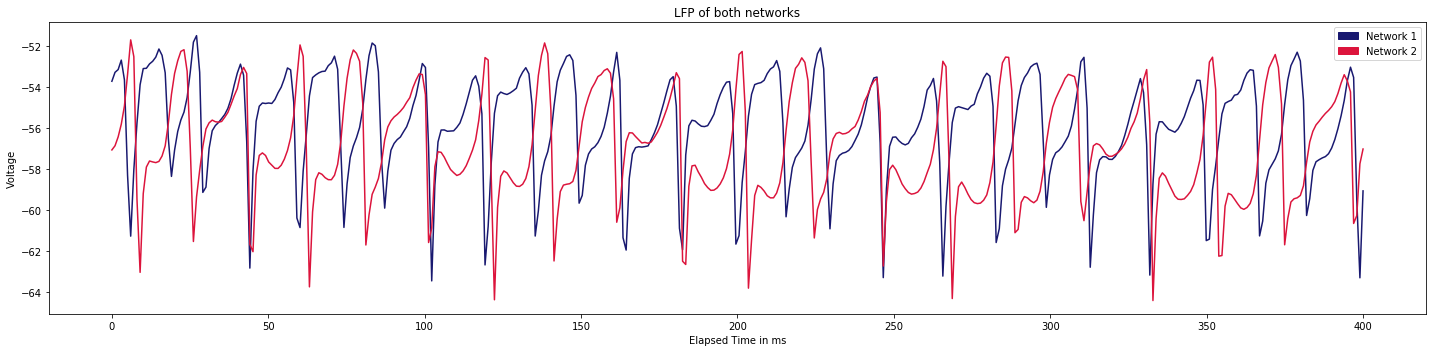

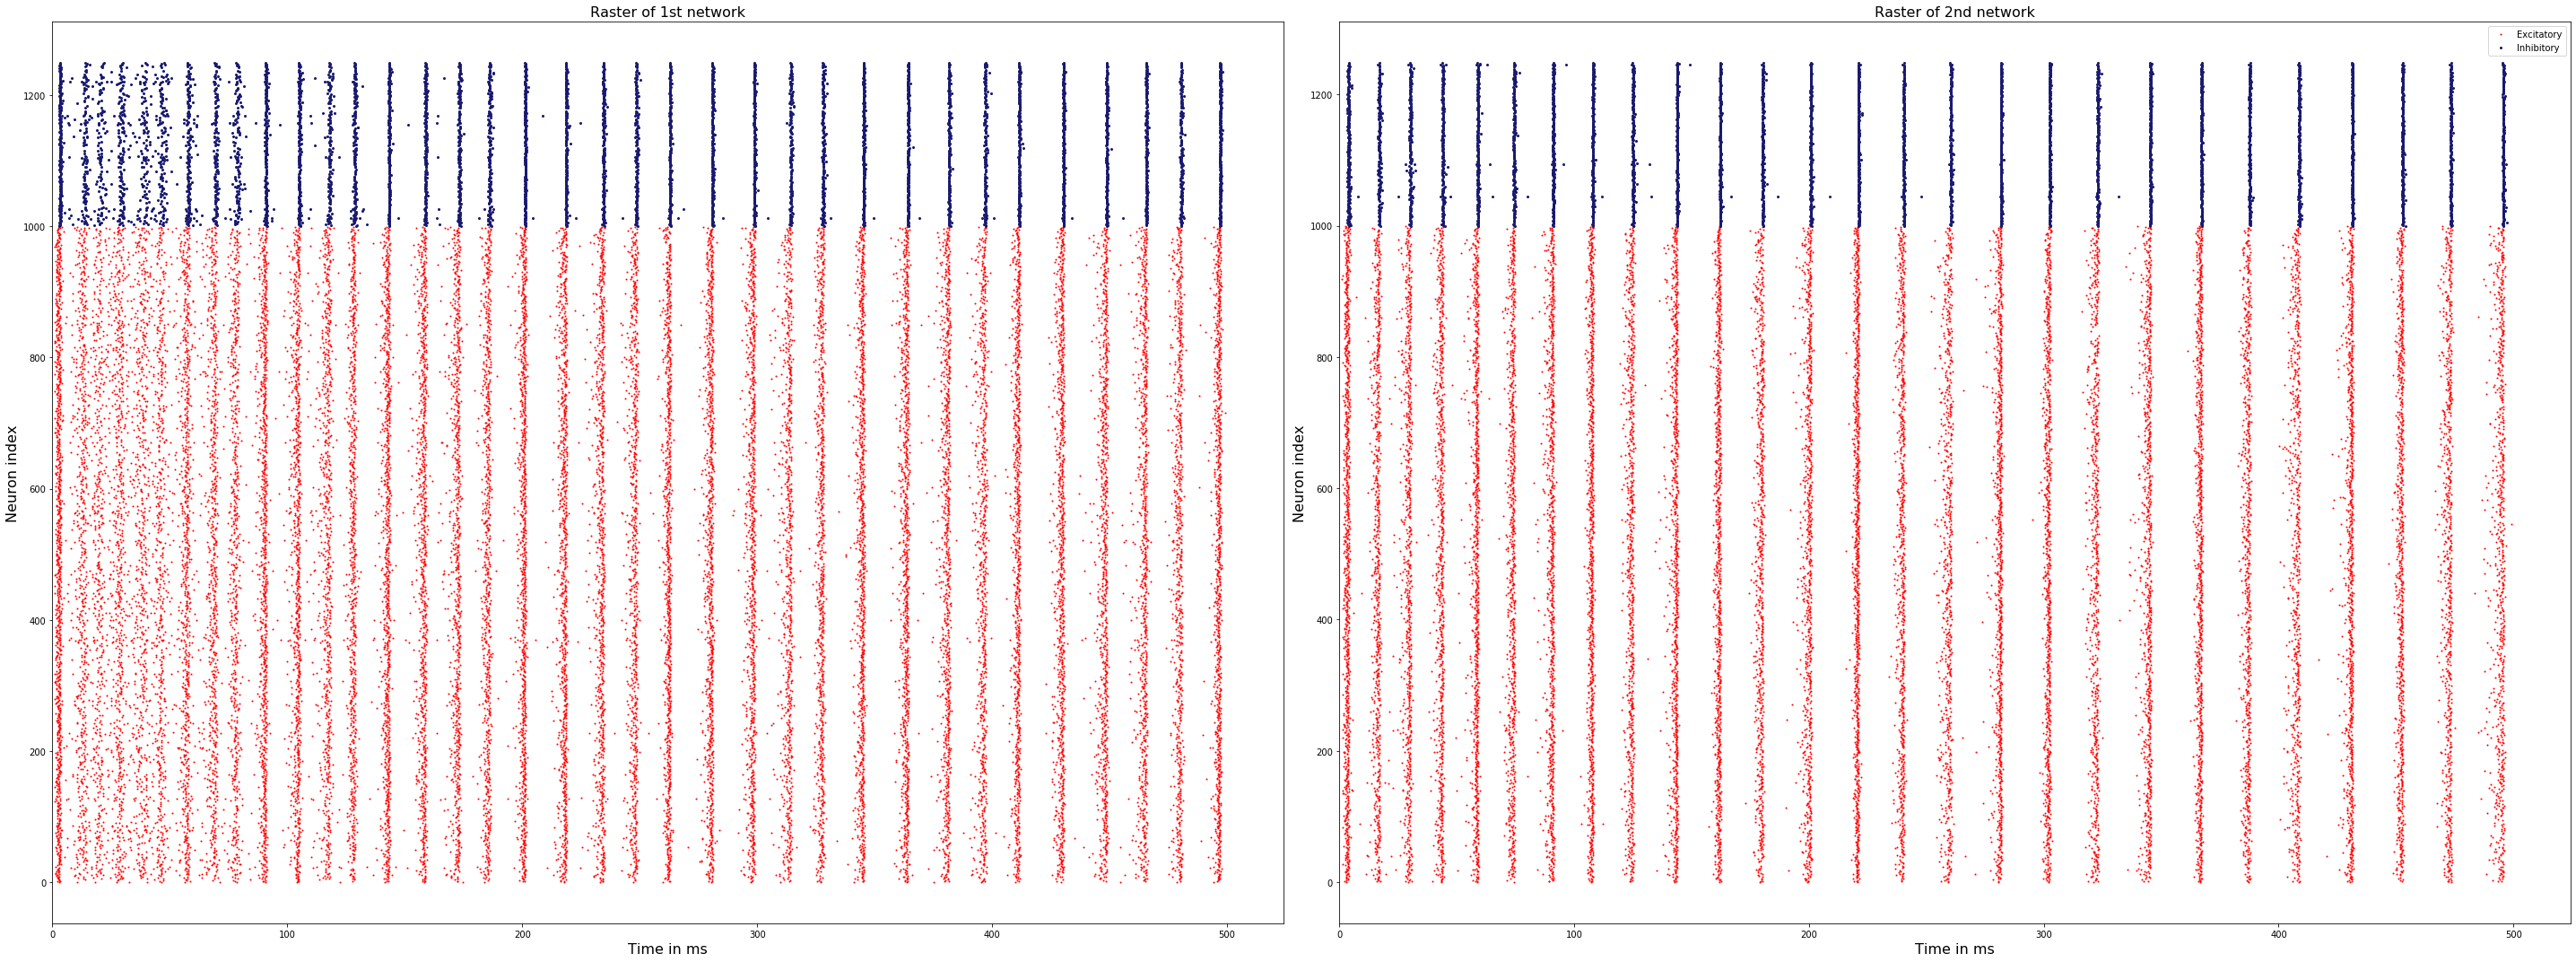

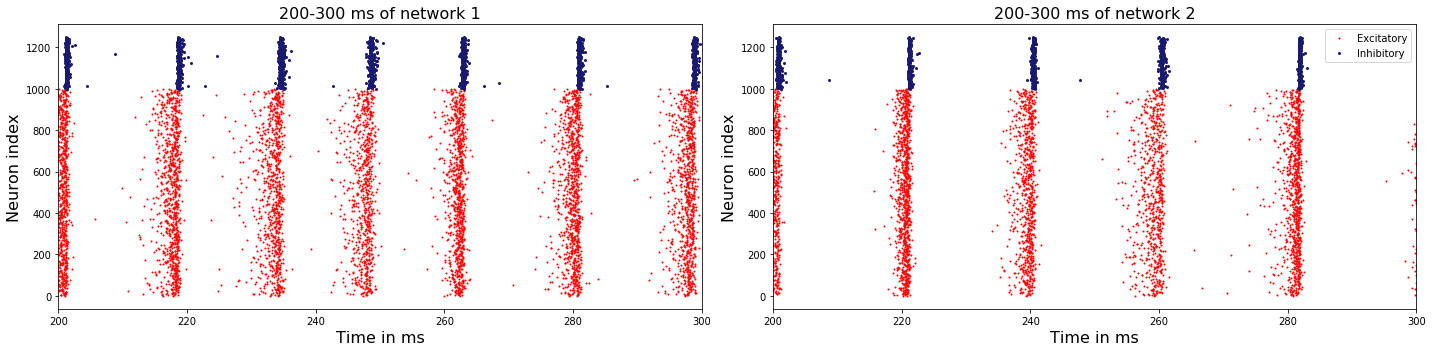

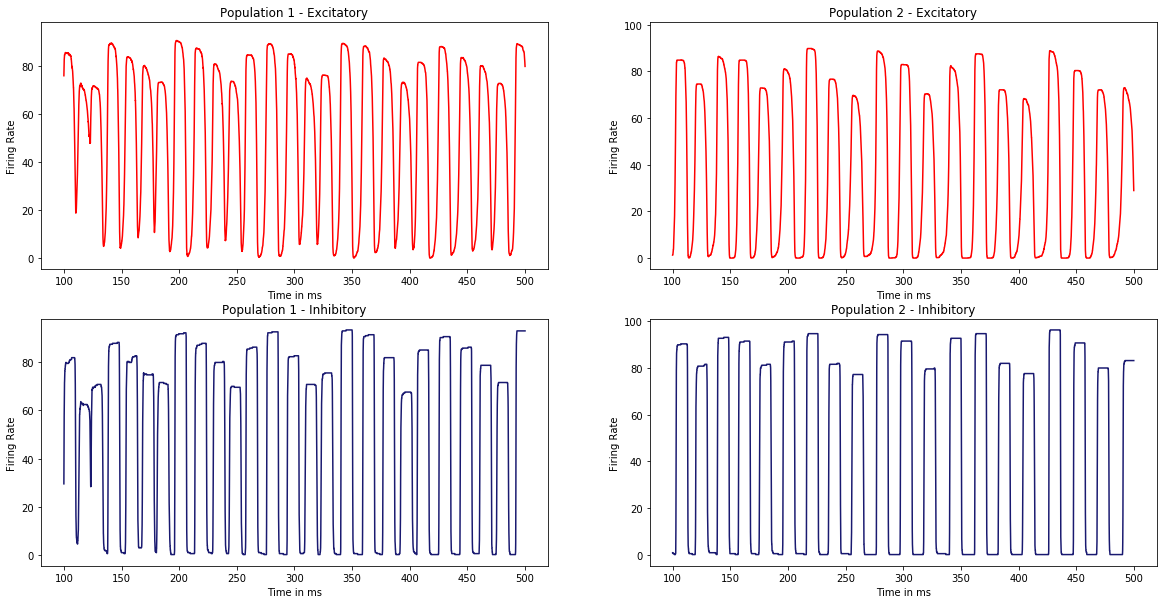

In [64]:
plots.plot_results(low_strength, pop_rates=True, xlim_psd=80, full_raster=True)

## Second variation 

In [49]:
params_mid = dict(params)
params_mid.update({
    "poisson_I_enabled": True,
    "poisson_I_ratio": 0.5,
    "poisson_variance": 4.0,
    "J_itoi": 0.0,
    "J_etoe": 0.0,
    "J_etoi": 0.0,
    "J_itoe": 0.0,
    "J_ppee": 0.0,
    "J_ppei": 0.0,
})

low_strength = runner.run(
    modified_params=params_mid
)

Initializing net ...
Net 1 - poisson rate 15625.0 - single neuron 19.53125
Poisson strength: 0.016
Net 2 - rate for single neuron 13.671875
Initialization time: 0.47562599182128906s
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 4s
runtime: 7.6


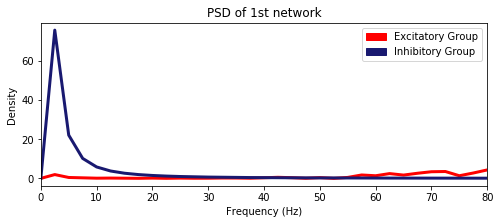

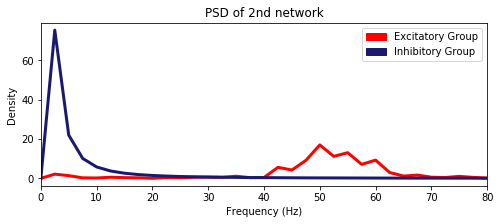

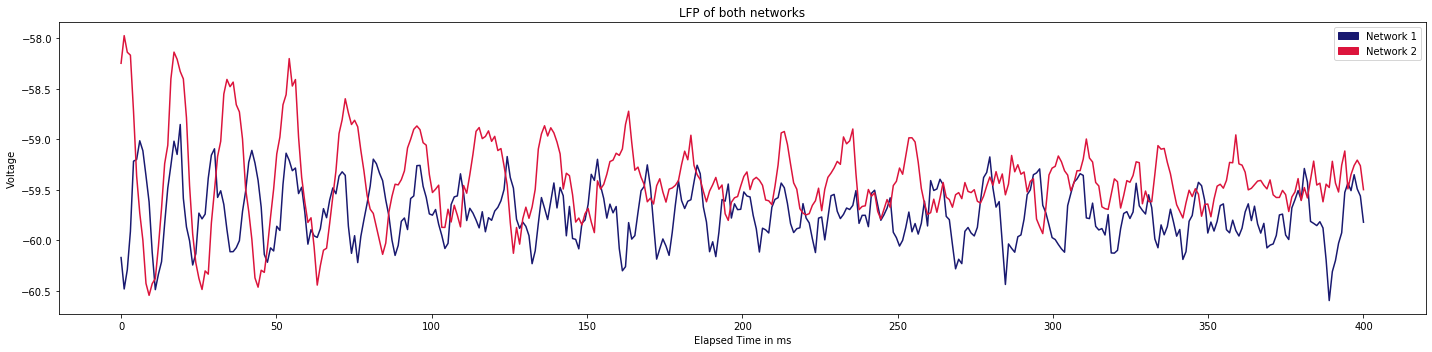

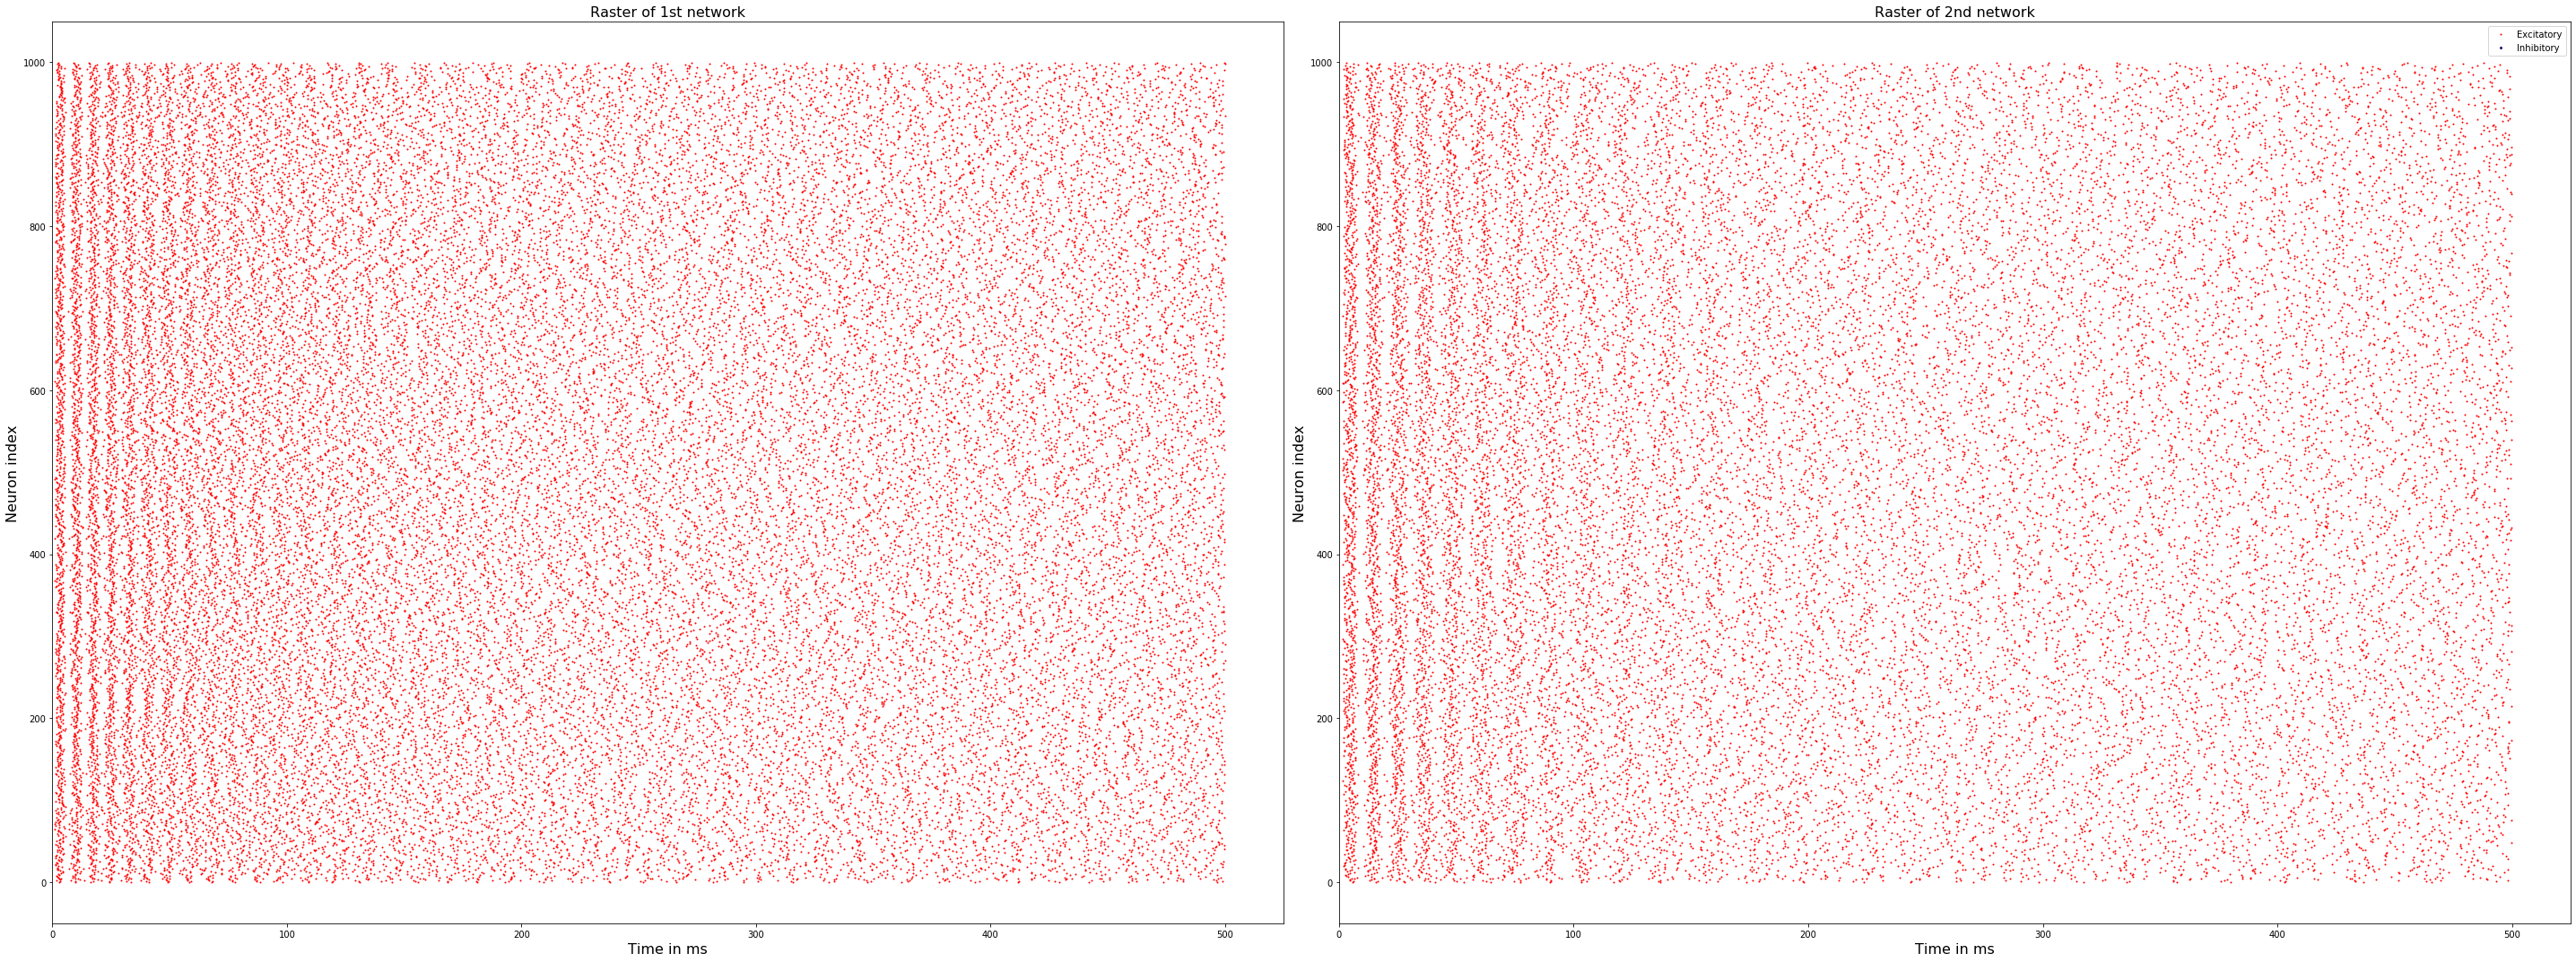

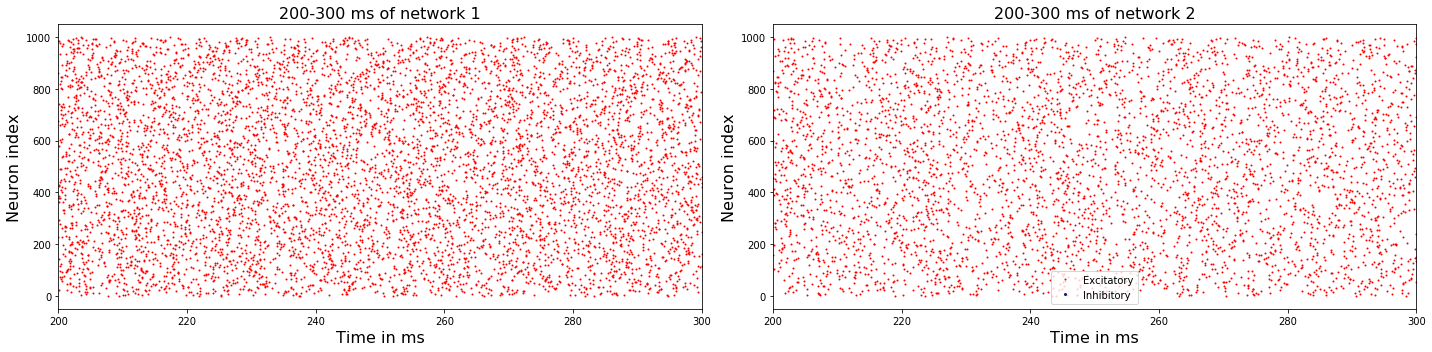

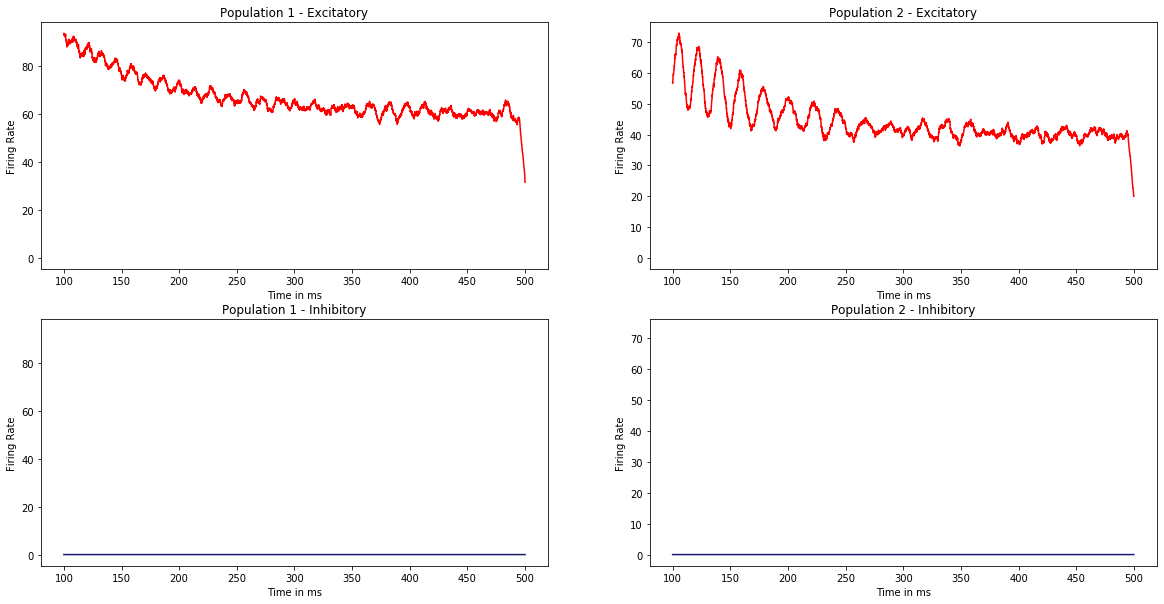

In [50]:
plots.plot_results(low_strength, pop_rates=True, xlim_psd=80, full_raster=True)

# Explorations

## Single Param Exploration

* too much excitation if strength is high
* 

In [66]:
exp_params = {
    "poisson_variance": np.arange(1.0, 20.0, 1.0),
}

ov_params = dict(params)
ov_params.update({
     "runtime": 1000.0,
     "poisson_p": 0.8, 
     "J_ppee": 0.4,
     "J_ppei": 0.4,
      "p_ppee": 0.05,
     "p_ppei": 0.05,
    "poisson_I_enabled": True,
    "poisson_I_ratio": 0.2,
})

ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=exp_params, 
    default_params=ov_params,
    hdf_filename=constants.MODELS_PATH + "/2_nets_uncorr_synch_noise_strength_exploration.h5",
    exploration_name="exp_10"
)

In [67]:
ex.run()

2020-07-15 13:27:26,384	INFO resource_spec.py:212 -- Starting Ray with 10.06 GiB memory available for workers and up to 5.04 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-07-15 13:27:26,626	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-07-15 13:27:26,786	INFO services.py:1165 -- View the Ray dashboard at localhost:8265
  0%|          | 0/19 [00:00<?, ?it/s]

(pid=29209) Initializing net ...
(pid=29209) Net 1 - poisson rate 15625.0 - single neuron 19.53125
(pid=29209) Poisson strength: 0.016
(pid=29209) I rate 3.90625
(pid=29217) Initializing net ...
(pid=29210) Initializing net ...
(pid=29210) Net 1 - poisson rate 7812.5 - single neuron 9.765625
(pid=29210) Poisson strength: 0.032
(pid=29210) I rate 1.953125
(pid=29216) Initializing net ...
(pid=29216) Net 1 - poisson rate 8928.571428571428 - single neuron 11.160714285714285
(pid=29216) Poisson strength: 0.028
(pid=29220) Initializing net ...
(pid=29220) Net 1 - poisson rate 6250.0 - single neuron 7.8125
(pid=29220) Poisson strength: 0.04
(pid=29220) I rate 1.5625
(pid=29215) Initializing net ...
(pid=29215) Net 1 - poisson rate 12500.0 - single neuron 15.625
(pid=29215) Poisson strength: 0.02
(pid=29215) I rate 3.125
(pid=29213) Initializing net ...
(pid=29213) Net 1 - poisson rate 62500.0 - single neuron 78.125
(pid=29213) Poisson strength: 0.004
(pid=29213) I rate 15.625
(pid=29212) Ini

 11%|█         | 2/19 [01:06<13:07, 46.35s/it]

(pid=29213) Initializing net ...
(pid=29213) Net 1 - poisson rate 3906.25 - single neuron 4.8828125
(pid=29213) Poisson strength: 0.064
(pid=29213) I rate 0.9765625
(pid=29219) Net 2 - rate for single neuron 4.166666666666667
(pid=29209) Initializing net ...
(pid=29209) Net 1 - poisson rate 3472.2222222222226 - single neuron 4.340277777777779
(pid=29209) Poisson strength: 0.072
(pid=29209) I rate 0.8680555555555558
(pid=29220) Initializing net ...
(pid=29220) Net 1 - poisson rate 3676.4705882352937 - single neuron 4.595588235294117
(pid=29220) Poisson strength: 0.068
(pid=29220) I rate 0.9191176470588234
(pid=29218) Initializing net ...
(pid=29218) Net 1 - poisson rate 3289.4736842105262 - single neuron 4.1118421052631575
(pid=29218) Poisson strength: 0.076
(pid=29218) I rate 0.8223684210526315
(pid=29220) Net 2 - rate for single neuron 3.6764705882352935
(pid=29213) Net 2 - rate for single neuron 3.90625
(pid=29209) Net 2 - rate for single neuron 3.472222222222223
(pid=29218) Net 2 - 

 21%|██        | 4/19 [01:07<05:43, 22.92s/it]

(pid=29219) Initialization time: 1.3283116817474365s


 32%|███▏      | 6/19 [01:07<02:27, 11.32s/it]

(pid=29220) Initialization time: 1.2043068408966064s
(pid=29213) Initialization time: 1.253838062286377s
(pid=29209) Initialization time: 1.207759141921997s
(pid=29218) Initialization time: 1.1922979354858398s


 63%|██████▎   | 12/19 [01:08<00:10,  1.46s/it]

(pid=29222) Initializing net ...
(pid=29222) Net 1 - poisson rate 4807.692307692308 - single neuron 6.009615384615384
(pid=29222) Poisson strength: 0.052
(pid=29222) I rate 1.2019230769230769
(pid=29222) Net 2 - rate for single neuron 4.8076923076923075
(pid=29222) Initialization time: 0.8524186611175537s
(pid=29211) Starting simulation at t=0. s for a duration of 1. s
(pid=29219) Starting simulation at t=0. s for a duration of 1. s
(pid=29220) Starting simulation at t=0. s for a duration of 1. s
(pid=29209) Starting simulation at t=0. s for a duration of 1. s
(pid=29213) Starting simulation at t=0. s for a duration of 1. s
(pid=29218) Starting simulation at t=0. s for a duration of 1. s
(pid=29211) 0.4927 s (49%) simulated in 10s, estimated 10s remaining.
(pid=29219) 0.49525 s (49%) simulated in 10s, estimated 10s remaining.
(pid=29220) 0.48135 s (48%) simulated in 10s, estimated 11s remaining.
(pid=29209) 0.4713 s (47%) simulated in 10s, estimated 11s remaining.
(pid=29213) 0.4774 s 

100%|██████████| 19/19 [01:56<00:00,  6.11s/it]


In [68]:
ex.load_results(all=True)

100%|██████████| 19/19 [00:01<00:00, 10.23it/s]


{'J_etoe': 0.1,
 'J_etoi': 0.3,
 'J_itoe': 6.0,
 'J_itoi': 6.0,
 'J_ppee': 0.4,
 'J_ppei': 0.4,
 'N_pop': 2,
 'ou_enabled': [False, False],
 'p_ppee': 0.05,
 'p_ppei': 0.05,
 'poisson_I_enabled': True,
 'poisson_I_ratio': 0.2,
 'poisson_enabled': [True, True],
 'poisson_mean_input': 250,
 'poisson_p': 0.8,
 'poisson_size': 800,
 'poisson_variance': 2.0,
 'runtime': 1000.0}


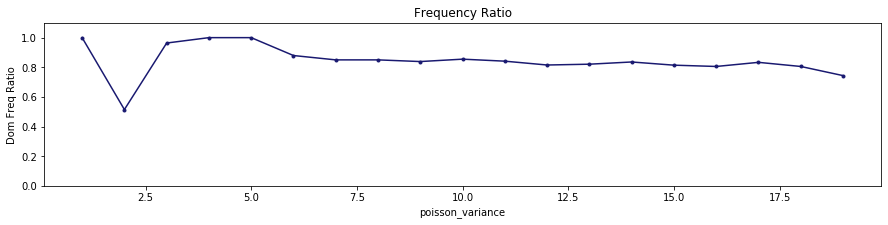

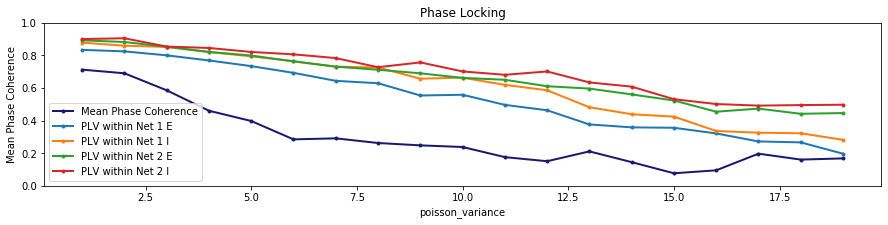

In [69]:
import pprint

plots.plot_exploration(ex, vmin_ratio=None, vmin_phase=None, vmax_phase=None)
pprint.pprint(ex.default_params)

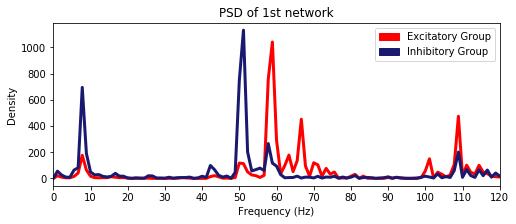

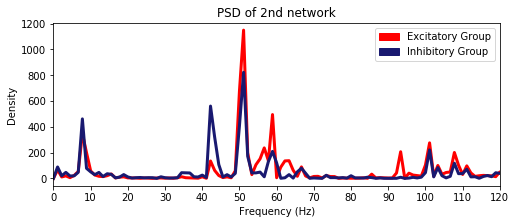

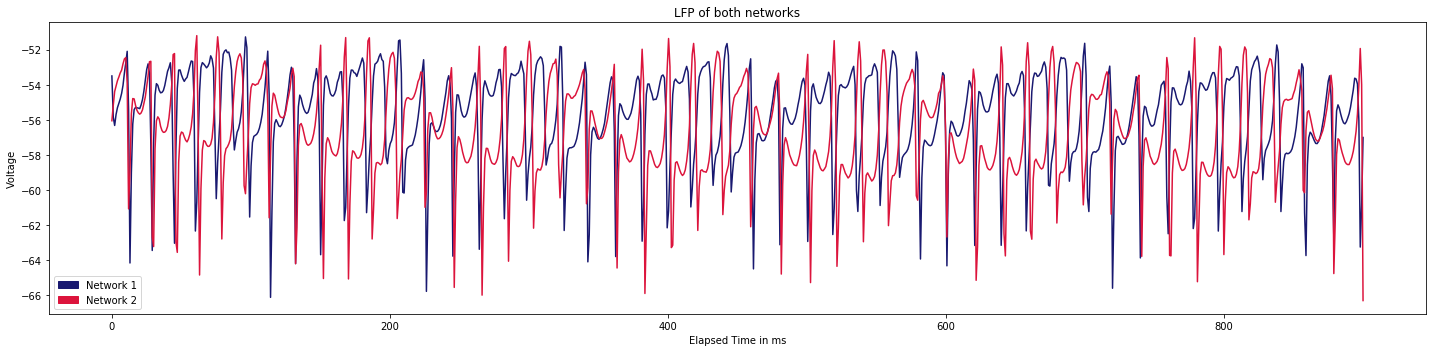

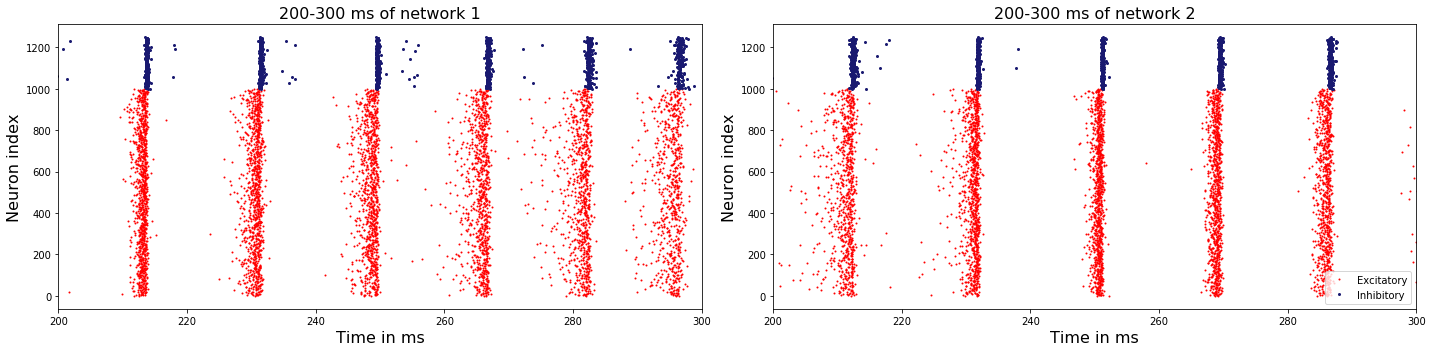

In [70]:
plots.plot_results(ex.get_run(5))

In [71]:
print(ex.params[5])
ex.default_params

{'poisson_variance': 6.0}


{'runtime': 1000.0,
 'J_itoi': 6.0,
 'J_etoe': 0.1,
 'J_etoi': 0.3,
 'J_itoe': 6.0,
 'J_ppee': 0.4,
 'J_ppei': 0.4,
 'ou_enabled': [False, False],
 'poisson_enabled': [True, True],
 'poisson_variance': 2.0,
 'poisson_p': 0.8,
 'poisson_size': 800,
 'poisson_mean_input': 250,
 'N_pop': 2,
 'p_ppee': 0.05,
 'p_ppei': 0.05,
 'poisson_I_enabled': True,
 'poisson_I_ratio': 0.2}

## Noise strength and ratio - Exploration

In [22]:
exp_params = {
  "poisson_variance": np.arange(1.0, 16.0, 1.0),
  "poisson_p": [0.6, 0.84],
}

ov_params = dict(params)
ov_params.update({
      "J_itoi": 3.0,
      "J_etoe": 0.6,
      "J_etoi": 3.2,
      "J_itoe": 7.0,
      "J_ppee": 0.6,
      "J_ppei": 0.6,
    
      "poisson_mean_input": 600,
})

ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=exp_params, 
    default_params=ov_params,
    hdf_filename=constants.MODELS_PATH + "/2_nets_uncorr_synch_noise_strength_exploration.h5",
    exploration_name="run_9"
)

In [53]:
ex.run()

(pid=83718) Starting simulation at t=0. s for a duration of 0.4 s
(pid=83726) Initializing net ...
(pid=83726) Net 1 - poisson rate 40000.0 - single neuron 50.0
(pid=83726) Poisson strength: 0.015


2020-07-03 16:18:57,835	INFO resource_spec.py:212 -- Starting Ray with 10.84 GiB memory available for workers and up to 5.43 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-07-03 16:18:58,108	INFO services.py:1170 -- View the Ray dashboard at localhost:8265
  0%|          | 0/30 [00:00<?, ?it/s]

(pid=84066) Initializing net ...
(pid=84066) Net 1 - poisson rate 360000.0 - single neuron 450.0
(pid=84066) Poisson strength: 0.0016666666666666668
(pid=84061) Initializing net ...
(pid=84061) Net 1 - poisson rate 180000.0 - single neuron 225.0
(pid=84061) Poisson strength: 0.0033333333333333335
(pid=84065) Initializing net ...
(pid=84065) Net 1 - poisson rate 90000.0 - single neuron 112.5
(pid=84065) Poisson strength: 0.006666666666666667
(pid=84064) Initializing net ...
(pid=84064) Net 1 - poisson rate 360000.0 - single neuron 450.0
(pid=84064) Poisson strength: 0.0016666666666666668
(pid=84062) Initializing net ...
(pid=84062) Net 1 - poisson rate 120000.0 - single neuron 150.0
(pid=84062) Poisson strength: 0.005
(pid=84067) Initializing net ...
(pid=84067) Net 1 - poisson rate 120000.0 - single neuron 150.0
(pid=84067) Poisson strength: 0.005
(pid=84068) Initializing net ...
(pid=84068) Net 1 - poisson rate 72000.0 - single neuron 90.0
(pid=84068) Poisson strength: 0.0083333333333

  7%|▋         | 2/30 [00:44<14:24, 30.87s/it]

(pid=84069) Initializing net ...
(pid=84069) Net 1 - poisson rate 32727.272727272728 - single neuron 40.90909090909091
(pid=84069) Poisson strength: 0.018333333333333333
(pid=84064) Initializing net ...
(pid=84064) Net 1 - poisson rate 30000.0 - single neuron 37.5
(pid=84064) Poisson strength: 0.02
(pid=84070) Initialization time: 1.8667850494384766s


 10%|█         | 3/30 [00:44<09:45, 21.67s/it]

(pid=84070) ==== Running Network ... ====


 13%|█▎        | 4/30 [00:44<06:35, 15.23s/it]

(pid=84063) Initialization time: 1.8627710342407227s
(pid=84069) Net 2 - rate for single neuron 34.36363636363636
(pid=84063) ==== Running Network ... ====
(pid=84064) Net 2 - rate for single neuron 22.5


 17%|█▋        | 5/30 [00:44<04:28, 10.72s/it]

(pid=84071) Initializing net ...
(pid=84071) Net 1 - poisson rate 27692.30769230769 - single neuron 34.61538461538461
(pid=84071) Poisson strength: 0.021666666666666667
(pid=84068) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84071) Net 2 - rate for single neuron 20.769230769230766
(pid=84070) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84069) Initialization time: 1.9752540588378906s
(pid=84064) Initialization time: 1.9814980030059814s
(pid=84069) ==== Running Network ... ====
(pid=84064) ==== Running Network ... ====
(pid=84063) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84071) Initialization time: 2.0527029037475586s
(pid=84071) ==== Running Network ... ====


 20%|██        | 6/30 [00:47<03:21,  8.39s/it]

(pid=84069) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84064) Starting simulation at t=0. s for a duration of 0.4 s


 23%|██▎       | 7/30 [00:47<02:16,  5.94s/it]

(pid=84067) Initializing net ...
(pid=84067) Net 1 - poisson rate 27692.30769230769 - single neuron 34.61538461538461
(pid=84067) Poisson strength: 0.021666666666666667


 33%|███▎      | 10/30 [00:48<00:43,  2.19s/it]

(pid=84067) Net 2 - rate for single neuron 29.076923076923073


 47%|████▋     | 14/30 [00:49<00:11,  1.41it/s]

(pid=84067) Initialization time: 2.1253790855407715s
(pid=84067) ==== Running Network ... ====
(pid=84088) Initializing net ...
(pid=84088) Net 1 - poisson rate 32727.272727272728 - single neuron 40.90909090909091
(pid=84088) Poisson strength: 0.018333333333333333
(pid=84088) Net 2 - rate for single neuron 24.545454545454543
(pid=84066) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84061) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84083) Initializing net ...
(pid=84083) Net 1 - poisson rate 30000.0 - single neuron 37.5
(pid=84083) Poisson strength: 0.02
(pid=84068) 273.2 ms (68%) simulated in 10s, estimated 5s remaining.
(pid=84083) Net 2 - rate for single neuron 31.5
(pid=84072) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84088) Initialization time: 2.3983330726623535s
(pid=84088) ==== Running Network ... ====
(pid=84070) 271.85 ms (67%) simulated in 10s, estimated 5s remaining.
(pid=84063) 264.45 ms (66%) simulated in 10s, estimated 5s rema

 50%|█████     | 15/30 [01:14<02:01,  8.07s/it]

(pid=84068) Starting simulation at t=0. s for a duration of 0.4 s


 57%|█████▋    | 17/30 [01:15<00:55,  4.23s/it]

(pid=84067) 0.4 s (100%) simulated in 13s
(pid=84067) ==== Network Run Finished ====
(pid=84067) runtime: 25.7


 67%|██████▋   | 20/30 [01:16<00:15,  1.60s/it]

(pid=84088) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84070) 0.39265 s (98%) simulated in 10s, estimated < 1s remaining.
(pid=84070) 0.4 s (100%) simulated in 10s
(pid=84070) ==== Network Run Finished ====
(pid=84070) runtime: 11.7
(pid=84063) 0.4 s (100%) simulated in 9s
(pid=84063) ==== Network Run Finished ====
(pid=84063) runtime: 11.3
(pid=84069) 0.4 s (100%) simulated in 9s
(pid=84069) ==== Network Run Finished ====
(pid=84069) runtime: 10.6
(pid=84068) 0.4 s (100%) simulated in 8s
(pid=84068) ==== Network Run Finished ====
(pid=84068) runtime: 14.3
(pid=84083) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84088) 0.4 s (100%) simulated in 6s
(pid=84088) ==== Network Run Finished ====
(pid=84088) runtime: 31.6
(pid=84088) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]


 73%|███████▎  | 22/30 [01:30<00:29,  3.64s/it]

(pid=84083) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=84083) 0.4 s (100%) simulated in 5s
(pid=84083) ==== Network Run Finished ====
(pid=84083) runtime: 32.9


100%|██████████| 30/30 [01:33<00:00,  3.10s/it]


In [54]:
ex.load_results(all=True)

100%|██████████| 30/30 [00:03<00:00,  9.45it/s]


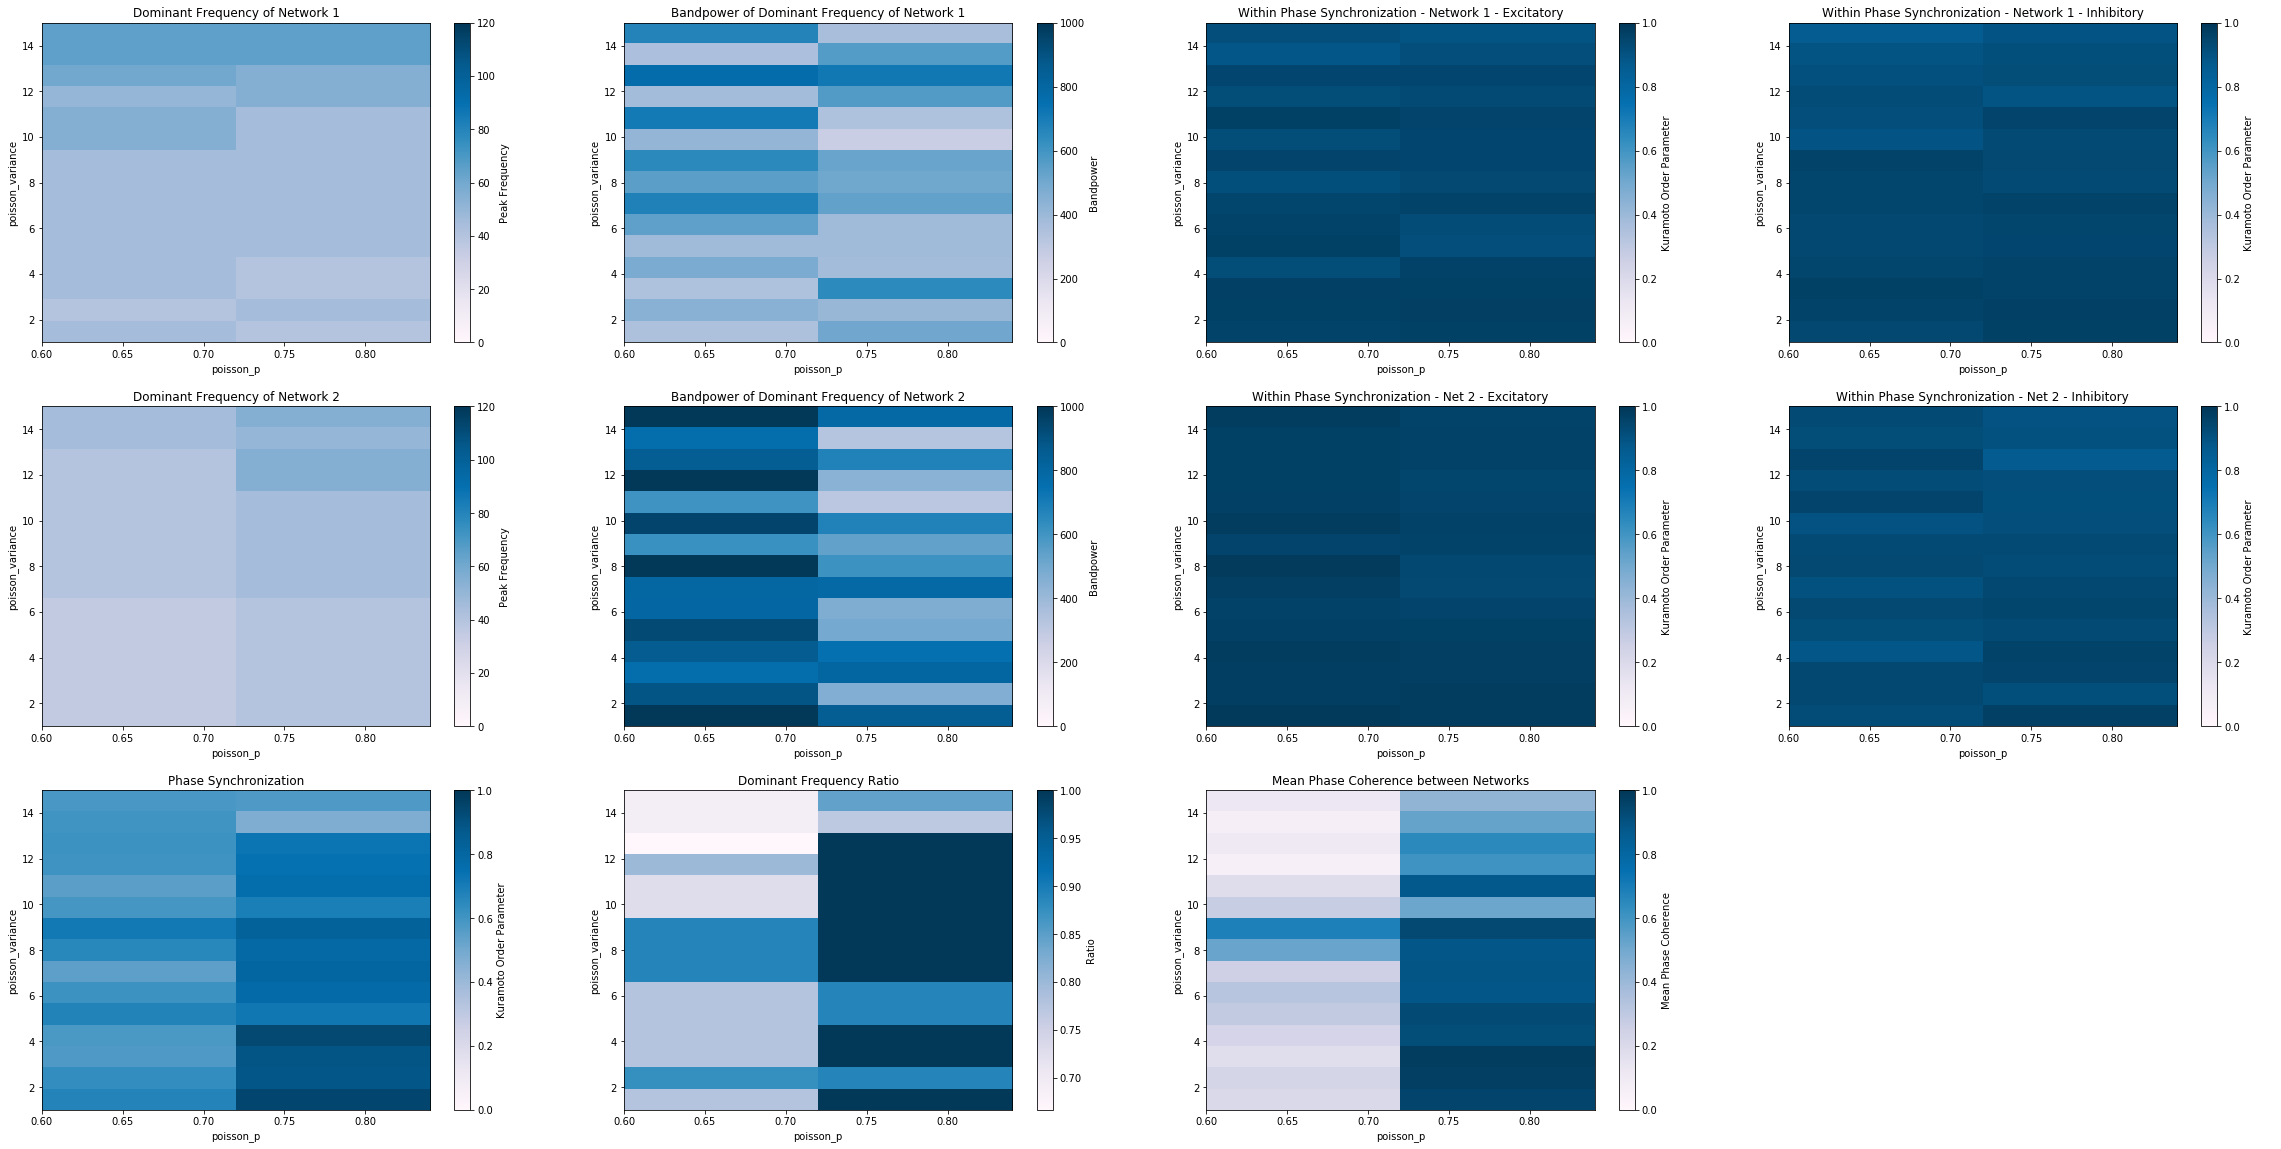

In [55]:
plots.plot_exploration(ex, vmin_ratio=None)